In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Menyiapkan Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 2. Memuat Data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/SC/latih',  # Ganti dengan path data pelatihan Anda
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/SC/validasi',  # Ganti dengan path data validasi Anda
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# 3. Membuat Model dengan Transfer Learning (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Membekukan semua layer base model (untuk fine-tuning bertahap)
base_model.trainable = False  # Semua layer base model dibekukan

# Membangun model dengan lapisan tambahan
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularisasi dropout
x = Dense(10, activation='softmax')(x)  # Sesuaikan dengan jumlah kelas Anda

# Final model
model = Model(inputs=base_model.input, outputs=x)

# 4. Kompilasi Model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# 5. Melatih Model (tanpa callbacks)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Menyimpan Model
model.save('path_to_save_model.h5')

Found 60 images belonging to 10 classes.
Found 540 images belonging to 10 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 186s 173s/step - accuracy: 0.1476 - loss: 2.8411 - val_accuracy: 0.3537 - val_loss: 2.0376
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.3139 - loss: 2.1330 - val_accuracy: 0.4556 - val_loss: 1.7912
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.4881 - loss: 1.6344 - val_accuracy: 0.5630 - val_loss: 1.5468
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.5357 - loss: 1.5022 - val_accuracy: 0.6556 - val_loss: 1.3346
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5683 - loss: 1.2209 - val_accuracy: 0.7019 - val_loss: 1.1801
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.7604 - loss: 0.9666 - val_accuracy: 0.7389 - val_loss: 1.0559
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 5s/step - accuracy: 0.7174 - loss: 0.8610 - val_accuracy: 0.7556 - val_loss: 0.9396
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.8405 - loss: 0.6055 - val_accuracy: 0.7741 - val_loss: 0.8519
Epoch 9/20
2/2 ━━━━

In [3]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


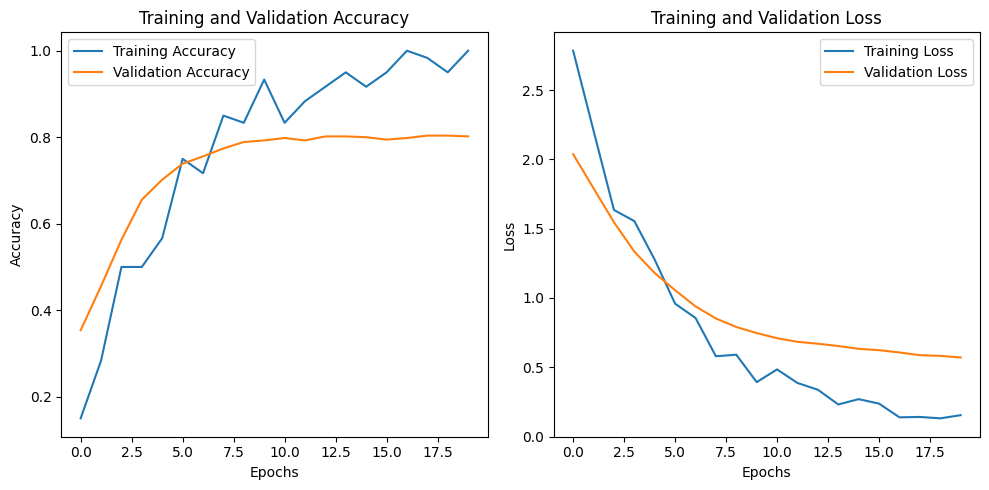

In [4]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
from ipywidgets import FileUpload
from PIL import Image
import io
import numpy as np
import tensorflow as tf

# Daftar kelas yang sesuai dengan model Anda
class_names = ['bat', 'butterfly', 'cat', 'cow', 'sheep', 'dog', 'elephant', 'horse', 'squirrel','tiger']

# Load model (gunakan model Anda sendiri)
model = tf.keras.models.load_model('/content/path_to_save_model.h5')

# Membuat widget untuk mengupload file
upload = FileUpload(accept='image/*', multiple=False)

# Fungsi untuk memproses gambar setelah diupload
def process_uploaded_image(change):
    # Mendapatkan file yang diupload
    img_data = next(iter(upload.value.values()))['content']

    # Membuka gambar dengan PIL
    img = Image.open(io.BytesIO(img_data))

    # Mengubah ukuran gambar sesuai input model (224x224)
    img_resized = img.resize((224, 224))

    # Mengubah gambar menjadi array numpy
    img_array = np.array(img_resized)

    # Menambah dimensi batch
    img_array = np.expand_dims(img_array, axis=0)

    # Normalisasi (sesuai dengan model yang digunakan)
    img_array = img_array / 255.0

    # Melakukan prediksi
    classes = model.predict(img_array)

    # Mengidentifikasi kelas berdasarkan prediksi
    predicted_class = np.argmax(classes, axis=1)

    # Menampilkan nama kelas prediksi
    predicted_class_name = class_names[predicted_class[0]]
    print(f'Predicted Class: {predicted_class_name}')

# Menyambungkan fungsi dengan upload event
upload.observe(process_uploaded_image, names='value')

# Tampilkan widget upload
display(upload)

FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: tiger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: squirrel
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: cow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: butterfly
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: sheep
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: elephant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: horse


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Mengevaluasi Model dengan Dataset Validasi
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Mendapatkan Prediksi dan Label Asli
y_true = validation_generator.classes  # Label sebenarnya
y_pred_prob = model.predict(validation_generator, verbose=1)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# 3. Menghitung dan Menampilkan Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# 4. Menghasilkan Laporan Klasifikasi (Precision, Recall, F1 Score)
target_names = list(validation_generator.class_indices.keys())  # Nama kelas
report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
print("Classification Report:")
print(report)

# 5. Menghitung Error Rate
error_rate = 1 - val_accuracy
print(f"Error Rate: {error_rate:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - accuracy: 0.8083 - loss: 0.5357
Validation Loss: 0.5709
Validation Accuracy: 0.8019
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 433ms/step
Confusion Matrix:
[[ 3  8  5  6  4 10  3  6  2  7]
 [ 4  7  8  8  5  3  3  5  5  6]
 [ 2  3  4  8  3  8  8  4  7  7]
 [ 5  3  3  5  3  5  3 11  8  8]
 [10  5  6  7  1  5  6  4  8  2]
 [ 8  7 10  5  4  5  3  3  5  4]
 [ 3  8  6  6  2  1  9  7  5  7]
 [ 0 12  7  3  3  6  4  8  7  4]
 [ 3  3  7  4  2 10  2 13  5  5]
 [ 3  5  8  7  1  7  4  9  5  5]]
Classification Report:
              precision    recall  f1-score   support

         bat     0.0732    0.0556    0.0632        54
   butterfly     0.1148    0.1296    0.1217        54
         cat     0.0625    0.0741    0.0678        54
         cow     0.0847    0.0926    0.0885        54
         dog     0.0357    0.0185    0.0244        54
    elephant     0.0833    0.0926    0.0877        54
       horse     0.2000    0.1667    0.1818        54
       sheep     0.1143   

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.8066 - loss: 0.5552
Validation Loss: 0.5709
Validation Accuracy: 0.8019
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step


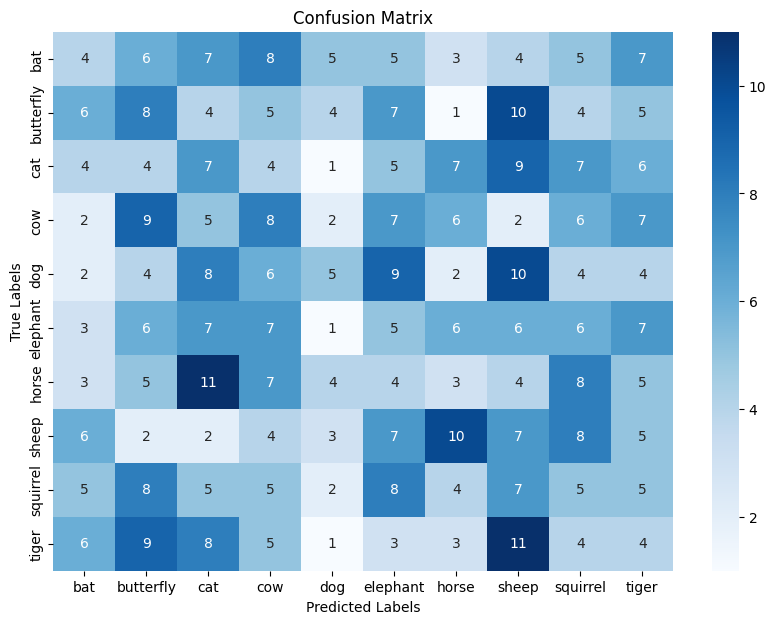

Classification Report:
              precision    recall  f1-score   support

         bat     0.0976    0.0741    0.0842        54
   butterfly     0.1311    0.1481    0.1391        54
         cat     0.1094    0.1296    0.1186        54
         cow     0.1356    0.1481    0.1416        54
         dog     0.1786    0.0926    0.1220        54
    elephant     0.0833    0.0926    0.0877        54
       horse     0.0667    0.0556    0.0606        54
       sheep     0.1000    0.1296    0.1129        54
    squirrel     0.0877    0.0926    0.0901        54
       tiger     0.0727    0.0741    0.0734        54

    accuracy                         0.1037       540
   macro avg     0.1063    0.1037    0.1030       540
weighted avg     0.1063    0.1037    0.1030       540

Error Rate: 0.1981


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Mengevaluasi Model dengan Dataset Validasi
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Mendapatkan Prediksi dan Label Asli
y_true = validation_generator.classes  # Label sebenarnya
y_pred_prob = model.predict(validation_generator, verbose=1)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# 3. Menghitung Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Menampilkan Confusion Matrix Berwarna
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 5. Menghasilkan Laporan Klasifikasi (Precision, Recall, F1 Score)
target_names = list(validation_generator.class_indices.keys())  # Nama kelas
report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
print("Classification Report:")
print(report)

# 6. Menghitung Error Rate
error_rate = 1 - val_accuracy
print(f"Error Rate: {error_rate:.4f}")